<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [40]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)

In [41]:
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

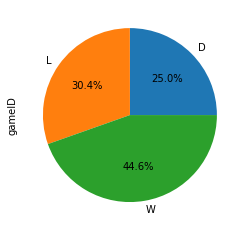

In [42]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

In [43]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

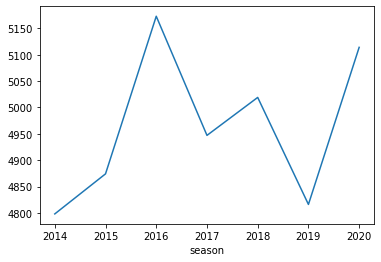

In [44]:
df_f_game.groupby(['season'])['totalGoals'].sum().plot()

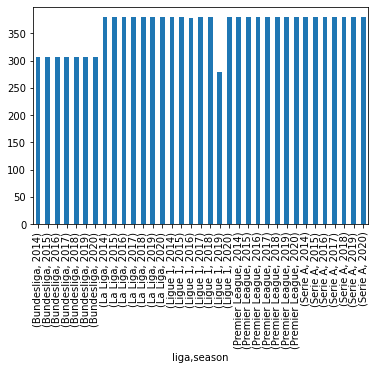

In [45]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

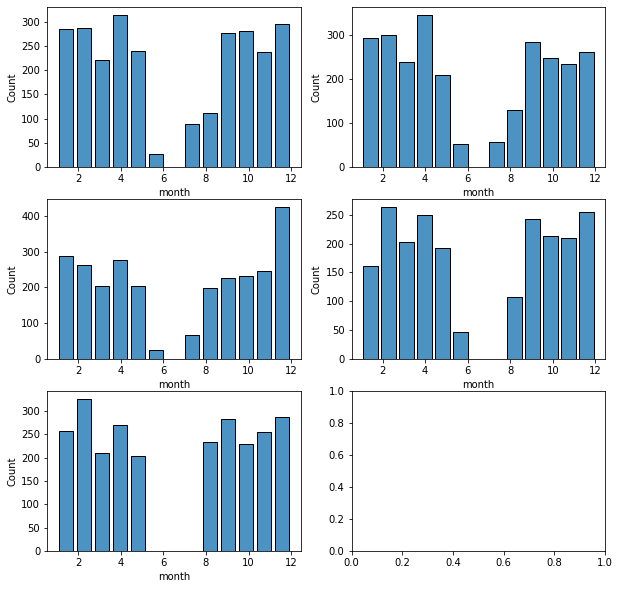

In [46]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


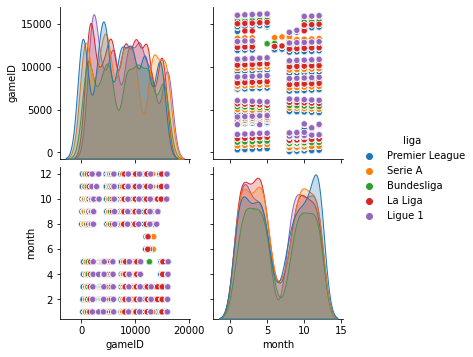

In [47]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")


## Mergeamos las tablas de df_apperances,df_shots y df_players

In [48]:
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")

df_apperance_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID"
)


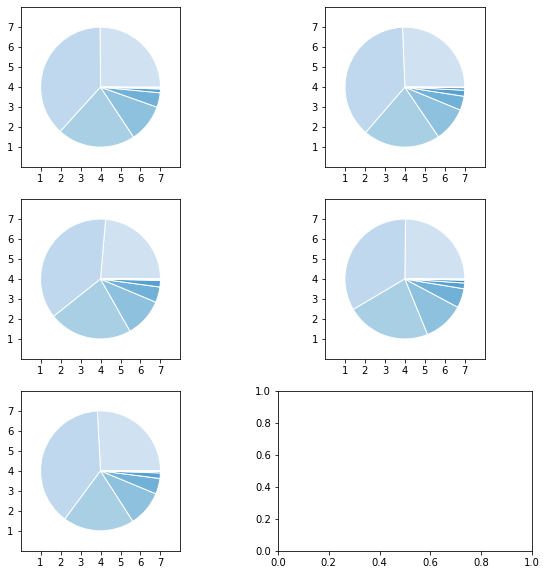

In [99]:

x_seriea=df_f_game_seriea.groupby(['goal_diff'])['gameID'].count()
x_laliga=df_f_game_laliga.groupby(['goal_diff'])['gameID'].count()
x_premier=df_f_game_premier.groupby(['goal_diff'])['gameID'].count()
x_bundesliga=df_f_game_bundesliga.groupby(['goal_diff'])['gameID'].count()
x_ligue1=df_f_game_ligue1.groupby(['goal_diff'])['gameID'].count()

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x_seriea)))

# plot
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0,0].pie(x_seriea, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[0,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax[0,1].pie(x_laliga, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[0,1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax[1,0].pie(x_premier, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[1,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax[1,1].pie(x_bundesliga, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[1,1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax[2,0].pie(x_ligue1, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[2,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))




plt.show()

In [50]:
df_f_game_seriea

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,...,corners_away,yellowCards_away,redCards_away,result_away,liga,home_name,away_name,month,totalGoals,goal_diff
2660,551,2,2015,2015-08-22 20:00:00,94,95,1,1,0,0,...,7,1.0,0,D,Serie A,Verona,Roma,8,2,0
2661,552,2,2015,2015-08-22 22:45:00,96,97,2,1,2,1,...,3,1.0,0,L,Serie A,Lazio,Bologna,8,3,1
2662,553,2,2015,2015-08-23 20:00:00,98,99,0,1,0,0,...,2,3.0,0,W,Serie A,Juventus,Udinese,8,1,1
2663,554,2,2015,2015-08-23 22:45:00,100,101,1,0,0,0,...,6,1.0,0,L,Serie A,Palermo,Genoa,8,1,1
2664,555,2,2015,2015-08-23 22:45:00,102,103,5,2,5,1,...,8,3.0,0,L,Serie A,Sampdoria,Carpi,8,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,15801,2,2020,2021-05-23 18:45:00,107,111,0,2,0,1,...,0,3.0,0,W,Serie A,Atalanta,AC Milan,5,2,2
5316,15802,2,2020,2021-05-22 18:45:00,102,230,3,0,2,0,...,4,1.0,0,L,Serie A,Sampdoria,Parma Calcio 1913,5,3,3
5317,15803,2,2020,2021-05-23 18:45:00,260,95,2,2,2,0,...,2,1.0,0,D,Serie A,Spezia,Roma,5,4,0
5318,15804,2,2020,2021-05-23 13:00:00,106,99,5,1,2,0,...,2,0.0,0,L,Serie A,Inter,Udinese,5,6,4


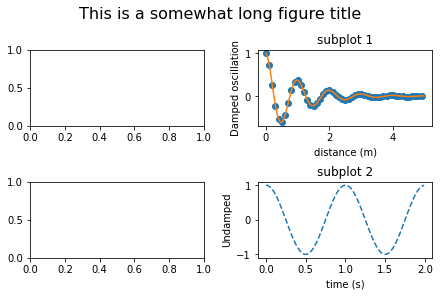

In [103]:
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)


fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0,1].plot(t1, f(t1), 'o', t2, f(t2), '-')
axs[0,1].set_title('subplot 1')
axs[0,1].set_xlabel('distance (m)')
axs[0,1].set_ylabel('Damped oscillation')
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1,1].plot(t3, np.cos(2*np.pi*t3), '--')
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_title('subplot 2')
axs[1,1].set_ylabel('Undamped')

plt.show()

In [110]:
groups=df_f_game_seriea.groupby(["liga",'goal_diff'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.barplot(data=df, x='tip', ax=ax[0])
sns.barplot(data=df, x='tip', ax=ax[1]);

('Serie A', 0)
2660      551
2675      566
2682      573
2683      574
2684      575
        ...  
5303    15789
5310    15796
5311    15797
5317    15803
5319    15805
Name: gameID, Length: 668, dtype: int64


('Serie A', 1)
2661      552
2662      553
2663      554
2665      556
2666      557
        ...  
5299    15785
5300    15786
5304    15790
5307    15793
5312    15798
Name: gameID, Length: 1015, dtype: int64


('Serie A', 2)
2667      558
2668      559
2673      564
2678      569
2679      570
        ...  
5305    15791
5306    15792
5308    15794
5314    15800
5315    15801
Name: gameID, Length: 560, dtype: int64


('Serie A', 3)
2664      555
2717      608
2729      620
2737      628
2743      634
        ...  
5285    15771
5286    15772
5309    15795
5313    15799
5316    15802
Name: gameID, Length: 273, dtype: int64


('Serie A', 4)
2677      568
2710      601
2728      619
2789      680
2812      703
        ...  
5142    15628
5189    15675
5287    15773
5298    15784
